In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/augnitotaskdataset/mtsamples.csv')
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [4]:
df.shape

(4999, 6)

In [5]:
df["medical_specialty"].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [6]:
#checking multilabel classification or single lable classification
df['medical_specialty'].apply(lambda x: ',' in x).sum()

0

It means it's a single lable classification task

In [7]:
num_classes = df['medical_specialty'].nunique()
print(f"Number of unique medical specialties: {num_classes}")

Number of unique medical specialties: 40


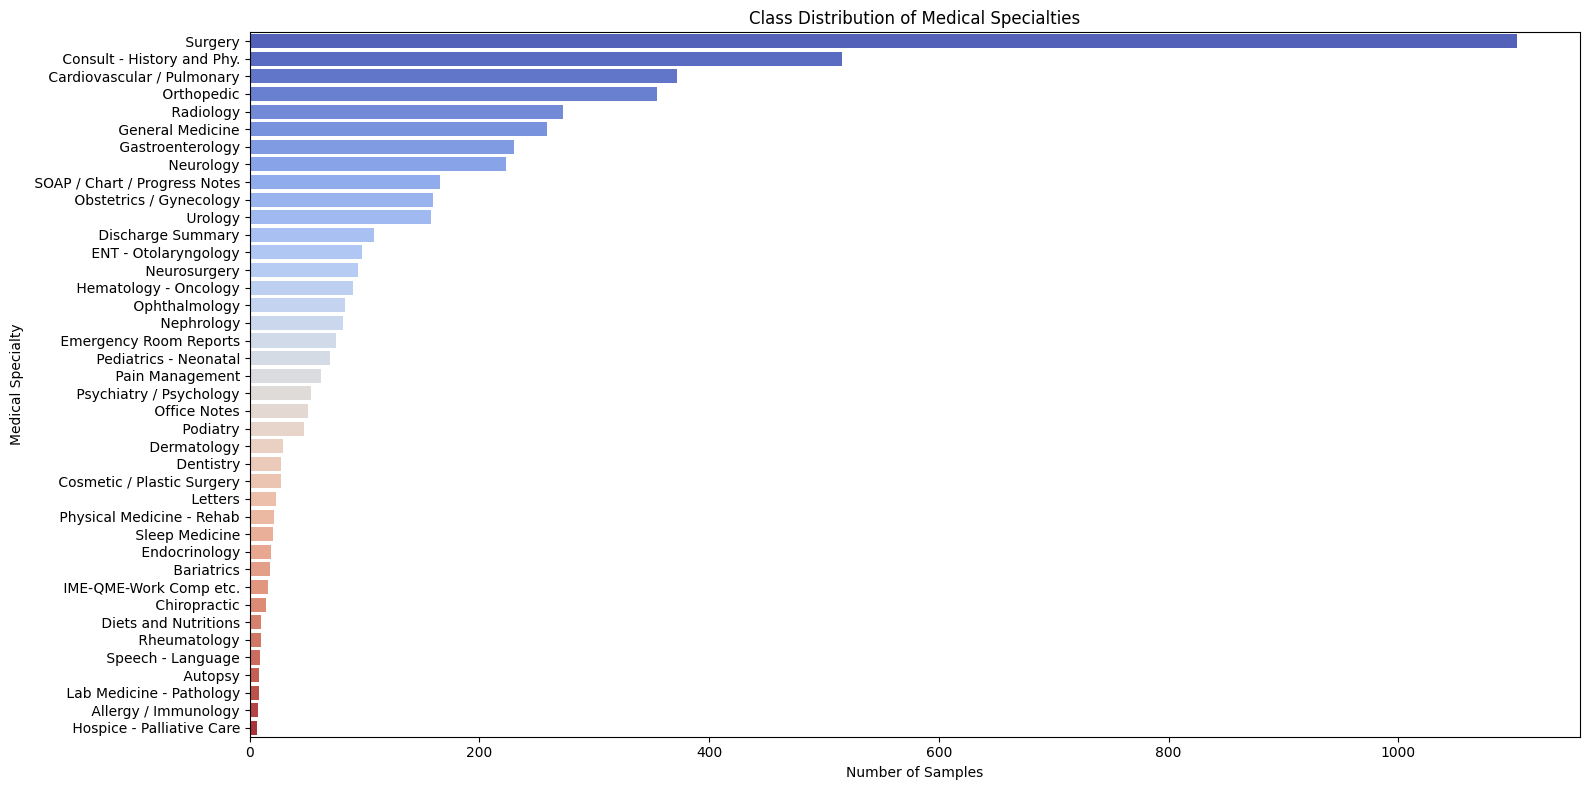

In [8]:
#Checking the class distribution of lables
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
ax = sns.countplot(data=df, y='medical_specialty', order=df['medical_specialty'].value_counts().index, palette='coolwarm')
plt.title('Class Distribution of Medical Specialties')
plt.xlabel('Number of Samples')
plt.ylabel('Medical Specialty')
plt.tight_layout()
plt.show()

Preprocessing 

In [9]:
import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)         
    return text.strip()

df['transcriptionCleaned'] = df['transcription'].apply(clean_text)


In [10]:
df['medical_specialty'] = df['medical_specialty'].str.strip().str.lower()

In [11]:
df['description_clean'] = df['description'].apply(clean_text)
df['keywordsCleaned'] = df['keywords'].apply(clean_text)

Handling Missing Values

In [12]:
df.dropna(subset=['transcription', 'medical_specialty'], inplace=True)

In [13]:
print("Missing values count per column:")
print(df.isnull().sum())

empty_transcriptions = (df['transcriptionCleaned'] == '').sum()
print(f"Empty cleaned transcription texts: {empty_transcriptions}")


Missing values count per column:
Unnamed: 0                 0
description                0
medical_specialty          0
sample_name                0
transcription              0
keywords                1068
transcriptionCleaned       0
description_clean          0
keywordsCleaned            0
dtype: int64
Empty cleaned transcription texts: 0


In [14]:
df['keywords'] = df['keywords'].fillna('')
df['keywordsCleaned'] = df['keywordsCleaned'].fillna('')

In [15]:
print("Missing values count per column:")
print(df.isnull().sum())

empty_transcriptions = (df['transcriptionCleaned'] == '').sum()
print(f"Empty cleaned transcription texts: {empty_transcriptions}")


Missing values count per column:
Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription           0
keywords                0
transcriptionCleaned    0
description_clean       0
keywordsCleaned         0
dtype: int64
Empty cleaned transcription texts: 0


Remove Duplicates

In [16]:
df.drop_duplicates(subset=['transcriptionCleaned'], inplace=True)

In [17]:
#Class distribution after cleaning
df['medical_specialty'].value_counts()

medical_specialty
surgery                          975
radiology                        248
general medicine                 157
urology                          156
soap / chart / progress notes    144
neurology                         67
orthopedic                        55
consult - history and phy.        55
pediatrics - neonatal             52
psychiatry / psychology           51
pain management                   45
office notes                      41
gastroenterology                  31
hematology - oncology             31
cardiovascular / pulmonary        26
obstetrics / gynecology           26
nephrology                        20
discharge summary                 17
sleep medicine                    17
emergency room reports            17
ent - otolaryngology              16
ophthalmology                     15
bariatrics                        10
podiatry                          10
physical medicine - rehab         10
speech - language                  9
ime-qme-work comp et

Severe class Imbalance

In [18]:
rare_classes = df['medical_specialty'].value_counts()[lambda x: x < 2].index
df['medical_specialty'] = df['medical_specialty'].apply(lambda x: x if x not in rare_classes else 'other')

In [19]:
df['medical_specialty'].value_counts()

medical_specialty
surgery                          975
radiology                        248
general medicine                 157
urology                          156
soap / chart / progress notes    144
neurology                         67
consult - history and phy.        55
orthopedic                        55
pediatrics - neonatal             52
psychiatry / psychology           51
pain management                   45
office notes                      41
gastroenterology                  31
hematology - oncology             31
cardiovascular / pulmonary        26
obstetrics / gynecology           26
nephrology                        20
emergency room reports            17
discharge summary                 17
sleep medicine                    17
ent - otolaryngology              16
ophthalmology                     15
podiatry                          10
bariatrics                        10
physical medicine - rehab         10
ime-qme-work comp etc.             9
speech - language   

In [21]:
df['full_text'] = (
    df['description_clean'].fillna('') + ' ' +
    df['transcriptionCleaned'].fillna('') + ' ' +
    df['keywordsCleaned'].fillna('')
)

In [22]:
print(df[['full_text', 'medical_specialty']].head(3))

                                           full_text medical_specialty
0  a 23 year old white female presents with compl...             other
1  consult for laparoscopic gastric bypass past m...        bariatrics
2  consult for laparoscopic gastric bypass histor...        bariatrics


In [23]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['medical_specialty'],
    random_state=42
)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")

print("Training class distribution:")
print(train_df['medical_specialty'].value_counts(normalize=True).sort_index())

print("\nValidation class distribution:")
print(val_df['medical_specialty'].value_counts(normalize=True).sort_index())


Training samples: 1884
Validation samples: 471
Training class distribution:
medical_specialty
autopsy                          0.003185
bariatrics                       0.004246
cardiovascular / pulmonary       0.011146
chiropractic                     0.001062
consult - history and phy.       0.023355
cosmetic / plastic surgery       0.001062
dermatology                      0.001592
discharge summary                0.006900
emergency room reports           0.007431
ent - otolaryngology             0.006900
gastroenterology                 0.013270
general medicine                 0.066348
hematology - oncology            0.013270
hospice - palliative care        0.002123
ime-qme-work comp etc.           0.003715
lab medicine - pathology         0.002123
letters                          0.003185
nephrology                       0.008493
neurology                        0.028662
obstetrics / gynecology          0.011146
office notes                     0.017516
ophthalmology           

If we see the data is imbalanced which can be noticed with surgery : 0.41 and rest contributing very less proportion

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,  
    ngram_range=(1,2), 
    stop_words='english'  
)


X_train = tfidf.fit_transform(train_df['full_text'])
X_val = tfidf.transform(val_df['full_text'])


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['medical_specialty'])
y_val = label_encoder.transform(val_df['medical_specialty'])


label_names = label_encoder.classes_

In [64]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, f1_score

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Macro F1 Score:", f1_score(y_val, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8280254777070064
Macro F1 Score: 0.5647157290163841

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       0.67      0.40      0.50         5
           4       0.47      0.64      0.54        11
           6       0.00      0.00      0.00         1
           7       0.67      0.50      0.57         4
           8       0.00      0.00      0.00         3
           9       0.75      1.00      0.86         3
          10       0.67      0.33      0.44         6
          11       0.50      0.56      0.53        32
          12       0.75      0.50      0.60         6
          13       0.00      0.00      0.00         1
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.50      0.50      0.50   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
!pip install transformers --quiet
!pip install scikit-learn --quiet

In [71]:
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model = bert_model.to(device)
bert_model.eval() 


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [72]:
X_train_text = train_df['full_text'].tolist()
y_train = train_df['medical_specialty'].tolist()

X_val_text = val_df['full_text'].tolist()
y_val = val_df['medical_specialty'].tolist()


In [73]:
def get_cls_embeddings(texts, tokenizer, model, batch_size=16):
    all_embeddings = []
    with torch.no_grad():
        for i in tqdm(range(0, len(texts), batch_size)):
            batch = texts[i:i+batch_size]
            encoded = tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=512)
            input_ids = encoded['input_ids'].to(device)
            attention_mask = encoded['attention_mask'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            cls_embeds = outputs.last_hidden_state[:, 0, :]  # CLS token
            all_embeddings.append(cls_embeds.cpu())
    
    return torch.cat(all_embeddings).numpy()

In [74]:
X_train_bert = get_cls_embeddings(X_train_text, tokenizer, bert_model)
X_val_bert = get_cls_embeddings(X_val_text, tokenizer, bert_model)

100%|██████████| 30/30 [00:17<00:00,  1.74it/s]


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train_bert, y_train)

y_pred_lr = lr_clf.predict(X_val_bert)

print("=== Logistic Regression Evaluation ===")
print("Accuracy:", accuracy_score(y_val, y_pred_lr))
print("Macro F1 Score:", f1_score(y_val, y_pred_lr, average='macro'))
print("\nClassification Report:\n", classification_report(y_val, y_pred_lr))

=== Logistic Regression Evaluation ===
Accuracy: 0.721868365180467
Macro F1 Score: 0.3865714239915983

Classification Report:
                                precision    recall  f1-score   support

                      autopsy       1.00      0.50      0.67         2
                   bariatrics       0.00      0.00      0.00         2
   cardiovascular / pulmonary       1.00      0.40      0.57         5
   consult - history and phy.       0.21      0.27      0.24        11
                  dermatology       0.00      0.00      0.00         1
            discharge summary       0.50      0.25      0.33         4
       emergency room reports       0.33      0.33      0.33         3
         ent - otolaryngology       1.00      0.33      0.50         3
             gastroenterology       0.00      0.00      0.00         6
             general medicine       0.33      0.50      0.40        32
        hematology - oncology       0.00      0.00      0.00         6
    hospice - pallia

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [76]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train_bert, y_train)

y_pred_svm = svm_clf.predict(X_val_bert)

print("=== SVM Evaluation ===")
print("Accuracy:", accuracy_score(y_val, y_pred_svm))
print("Macro F1 Score:", f1_score(y_val, y_pred_svm, average='macro'))
print("\nClassification Report:\n", classification_report(y_val, y_pred_svm))


=== SVM Evaluation ===
Accuracy: 0.7091295116772823
Macro F1 Score: 0.40792530305639596

Classification Report:
                                precision    recall  f1-score   support

                      autopsy       1.00      0.50      0.67         2
                   bariatrics       0.00      0.00      0.00         2
   cardiovascular / pulmonary       0.67      0.40      0.50         5
   consult - history and phy.       0.19      0.27      0.22        11
                  dermatology       0.00      0.00      0.00         1
            discharge summary       0.33      0.25      0.29         4
       emergency room reports       0.14      0.33      0.20         3
         ent - otolaryngology       1.00      0.33      0.50         3
             gastroenterology       0.00      0.00      0.00         6
             general medicine       0.28      0.31      0.29        32
        hematology - oncology       0.00      0.00      0.00         6
    hospice - palliative care     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Fine-tune BERT End-to-End (BERT + Classifier)

In [77]:
from transformers import BertTokenizerFast, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch

label2id = {label: i for i, label in enumerate(sorted(df['medical_specialty'].unique()))}
id2label = {i: label for label, i in label2id.items()}

# Dataset class
class MedicalDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=256):
        self.texts = texts
        self.labels = [label2id[label] for label in labels]
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx])
        }
        
train_dataset = MedicalDataset(train_df['full_text'].tolist(), train_df['medical_specialty'].tolist(), tokenizer)
val_dataset = MedicalDataset(val_df['full_text'].tolist(), val_df['medical_specialty'].tolist(), tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [84]:
from transformers import BertModel, get_scheduler
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, f1_score, classification_report
import torch.nn as nn
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertModel.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

loss_fn = nn.CrossEntropyLoss()

In [82]:
from tqdm import tqdm

def evaluate(model, val_loader):
    model.eval()
    preds, labels = [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            label = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)

            preds.extend(predictions.cpu().numpy())
            labels.extend(label.cpu().numpy())

    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='macro')
    print(f"\nValidation Accuracy: {acc:.4f}")
    print(f"Macro F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(labels, preds))
    return acc, f1

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

    print(f"\nEpoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")
    evaluate(model, val_loader)

Epoch 1: 100%|██████████| 118/118 [01:25<00:00,  1.38it/s]



Epoch 1 Loss: 2.3482


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation Accuracy: 0.5499
Macro F1 Score: 0.0607

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         6
          11       0.20      0.75      0.31        32
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         4
    

Epoch 2: 100%|██████████| 118/118 [01:23<00:00,  1.41it/s]



Epoch 2 Loss: 1.7313


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation Accuracy: 0.6051
Macro F1 Score: 0.0734

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         6
          11       0.22      0.84      0.35        32
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         4
    

Epoch 3: 100%|██████████| 118/118 [01:23<00:00,  1.41it/s]



Epoch 3 Loss: 1.5326

Validation Accuracy: 0.6093
Macro F1 Score: 0.0735

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         6
          11       0.25      0.84      0.38        32
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
# Reusing the earlier function
X_train_cls_ft = get_cls_embeddings(X_train_text, tokenizer, model)  # fine-tuned model
X_val_cls_ft = get_cls_embeddings(X_val_text, tokenizer, model)

100%|██████████| 30/30 [00:17<00:00,  1.69it/s]


In [86]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Train SVM
svm_ft = LinearSVC(max_iter=5000, random_state=42)
svm_ft.fit(X_train_cls_ft, y_train)

y_pred_ft_svm = svm_ft.predict(X_val_cls_ft)

acc_ft_svm = accuracy_score(y_val, y_pred_ft_svm)
f1_ft_svm = f1_score(y_val, y_pred_ft_svm, average='macro')

print(f"Validation Accuracy: {acc_ft_svm:.4f}")
print(f"Macro F1 Score: {f1_ft_svm:.4f}\n")

print("Classification Report:")
print(classification_report(y_val, y_pred_ft_svm))

Validation Accuracy: 0.6985
Macro F1 Score: 0.3694

Classification Report:
                               precision    recall  f1-score   support

                      autopsy       0.67      1.00      0.80         2
                   bariatrics       0.00      0.00      0.00         2
   cardiovascular / pulmonary       1.00      0.40      0.57         5
   consult - history and phy.       0.25      0.36      0.30        11
                  dermatology       0.00      0.00      0.00         1
            discharge summary       0.50      0.25      0.33         4
       emergency room reports       0.25      0.33      0.29         3
         ent - otolaryngology       1.00      0.33      0.50         3
             gastroenterology       0.00      0.00      0.00         6
             general medicine       0.30      0.34      0.32        32
        hematology - oncology       0.00      0.00      0.00         6
    hospice - palliative care       0.00      0.00      0.00         1
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Handling Class Imbalance

In [26]:
!pip install nlpaug
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.7 MB/s eta 0:00:00a 0:00:01


In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
import nlpaug.augmenter.word as naw

syn_aug = naw.SynonymAug(aug_src='wordnet')

def augment_text(text, n=1):
    return [syn_aug.augment(text) for _ in range(n)]


In [ ]:
# Oversampling
target_frac = 0.05
class_counts = train_df['medical_specialty'].value_counts(normalize=True)
under_represented_classes = class_counts[class_counts < target_frac].index.tolist()

augmented_texts = []
augmented_labels = []

for cls in under_represented_classes:
    samples = train_df[train_df['medical_specialty'] == cls]
    needed = int((target_frac * len(train_df)) - len(samples))
    num_aug_per_sample = max(1, needed // len(samples))

    for _, row in samples.iterrows():
        augmented = augment_text(row['full_text'], n=num_aug_per_sample)
        for new_text in augmented:
            augmented_texts.append(new_text)
            augmented_labels.append(cls)

bal_aug_df = pd.DataFrame({
    'full_text': augmented_texts,
    'medical_specialty': augmented_labels
})

# Adding to original training data
balanced_train_df = pd.concat([train_df, bal_aug_df]).reset_index(drop=True)


In [95]:
print(balanced_train_df['medical_specialty'].value_counts(normalize=True))

medical_specialty
surgery                          0.193309
radiology                        0.049071
urology                          0.030979
general medicine                 0.030979
soap / chart / progress notes    0.028501
neurology                        0.026766
cosmetic / plastic surgery       0.023296
chiropractic                     0.023296
dermatology                      0.023048
other                            0.023048
lab medicine - pathology         0.022800
hospice - palliative care        0.022800
discharge summary                0.022553
speech - language                0.022553
ime-qme-work comp etc.           0.022553
ent - otolaryngology             0.022553
rheumatology                     0.022305
letters                          0.022305
autopsy                          0.022305
orthopedic                       0.021809
physical medicine - rehab        0.021809
podiatry                         0.021809
consult - history and phy.       0.021809
bariatrics      

In [100]:
#Recomputing BERT embeddings for balanced_train_df
X_train_text = balanced_train_df['full_text'].tolist()
y_train = balanced_train_df['medical_specialty'].tolist()
X_train_bert = get_cls_embeddings(X_train_text, tokenizer, model)

100%|██████████| 253/253 [02:34<00:00,  1.64it/s]


# TF-IDF + SVM (after data augmentation)

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

X_train_text = balanced_train_df['full_text']
y_train = balanced_train_df['medical_specialty']
X_test_text = val_df['full_text']
y_test = val_df['medical_specialty']

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

clf = OneVsRestClassifier(SVC(kernel='linear', probability=True))
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

print("TF-IDF + SVM (After Augmentation):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

TF-IDF + SVM (After Augmentation):
Accuracy: 0.8259023354564756
Macro F1 Score: 0.6144166324257182

Classification Report:
                                precision    recall  f1-score   support

                      autopsy       1.00      0.50      0.67         2
                   bariatrics       1.00      1.00      1.00         2
   cardiovascular / pulmonary       0.80      0.80      0.80         5
   consult - history and phy.       0.46      0.55      0.50        11
                  dermatology       0.00      0.00      0.00         1
            discharge summary       0.67      0.50      0.57         4
       emergency room reports       0.25      0.33      0.29         3
         ent - otolaryngology       0.60      1.00      0.75         3
             gastroenterology       0.75      0.50      0.60         6
             general medicine       0.53      0.31      0.39        32
        hematology - oncology       0.60      0.50      0.55         6
    hospice - palliativ

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

clf_bert_frozen = OneVsRestClassifier(SVC(kernel='linear', probability=True))
clf_bert_frozen.fit(X_train_bert, y_train_enc)

y_pred_enc = clf_bert_frozen.predict(X_val_bert)
y_pred = label_encoder.inverse_transform(y_pred_enc)

print("Frozen BERT CLS Embeddings + SVM (After Augmentation):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Frozen BERT CLS Embeddings + SVM (After Augmentation):
Accuracy: 0.6963906581740976
Macro F1 Score: 0.3646896782348541

Classification Report:
                                precision    recall  f1-score   support

                      autopsy       0.50      0.50      0.50         2
                   bariatrics       0.00      0.00      0.00         2
   cardiovascular / pulmonary       0.60      0.60      0.60         5
   consult - history and phy.       0.12      0.18      0.15        11
                  dermatology       0.00      0.00      0.00         1
            discharge summary       0.33      0.25      0.29         4
       emergency room reports       0.20      0.33      0.25         3
         ent - otolaryngology       0.50      0.33      0.40         3
             gastroenterology       0.00      0.00      0.00         6
             general medicine       0.33      0.28      0.31        32
        hematology - oncology       0.29      0.33      0.31         6
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
